# Concerns regarding housing in the area of Boston Mass 
### Data set: Boston.CSV
##### Task 1 – Find variables which are best predictors of nitric oxide concentrations and provide regression plot and equation.


In [4]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt

df1 = pd.read_csv('/Users/rasam/Google Drive/Spring17/PSWD/Datasets/boston.csv', index_col=0)
df1.head()

,ZN,NDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,,,,,,,,,,,,,
0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
df1.describe()

,ZN,NDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Let’s try to find the correlation between nitric oxide and rest of the attributes.

In [11]:
correlations = {}

columns = df1.columns.tolist()

for col_a, col_b in itertools.combinations(columns, 2):
    correlations[col_a + '__' + 'NOX'] = np.corrcoef(df1.loc[:, col_a], df1.loc[:, 'NOX'])


In [22]:
correlations

{'AGE__NOX': array([[ 1.       ,  0.7314701],
        [ 0.7314701,  1.       ]]),
 'B__NOX': array([[ 1.        , -0.38005064],
        [-0.38005064,  1.        ]]),
 'CHAS__NOX': array([[ 1.        ,  0.09120281],
        [ 0.09120281,  1.        ]]),
 'DIS__NOX': array([[ 1.        , -0.76923011],
        [-0.76923011,  1.        ]]),
 'LSTAT__NOX': array([[ 1.        ,  0.59087892],
        [ 0.59087892,  1.        ]]),
 'NDUS__NOX': array([[ 1.        ,  0.76365145],
        [ 0.76365145,  1.        ]]),
 'NOX__NOX': array([[ 1.,  1.],
        [ 1.,  1.]]),
 'PTRATIO__NOX': array([[ 1.        ,  0.18893268],
        [ 0.18893268,  1.        ]]),
 'RAD__NOX': array([[ 1.        ,  0.61144056],
        [ 0.61144056,  1.        ]]),
 'RM__NOX': array([[ 1.        , -0.30218819],
        [-0.30218819,  1.        ]]),
 'TAX__NOX': array([[ 1.       ,  0.6680232],
        [ 0.6680232,  1.       ]]),
 'ZN__NOX': array([[ 1.        , -0.51660371],
        [-0.51660371,  1.        ]])}

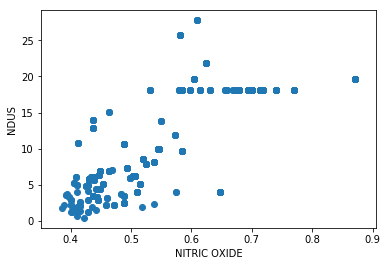

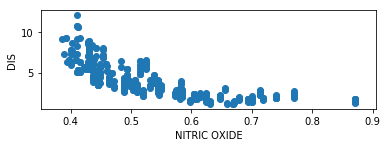

In [15]:
plt.figure()
plt.xlabel('NITRIC OXIDE')
plt.ylabel('NDUS')
plt.scatter(df1.NOX, df1.NDUS)
plt.show()
plt.subplot(212)
plt.xlabel('NITRIC OXIDE')
plt.ylabel('DIS')
plt.scatter(df1.NOX, df1.DIS)
plt.show()

The results indicate that there is a good correlation between NOX and , ‘NDUS’ , ‘DIS’ I which is 0.76 and -0.76 respectively. This indicates that NOX has positive correlation with NDUS and negative correlation with DIS.


Thus, Nitric oxide concentration increases as (DIS) distance to Boston Employment centers decreases and with an increase in non-retail business in town (NDUS).
Now let’s try to develop a regression model.

In [16]:
#Developing regression model.

import statsmodels.api as sm

y = df1.NOX
X = df1[['NDUS','DIS']]
X = sm.add_constant(X)

lr_model = sm.OLS(y,X).fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    NOX   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     554.3
Date:                Tue, 14 Mar 2017   Prob (F-statistic):          6.52e-128
Time:                        02:29:52   Log-Likelihood:                 667.66
No. Observations:                 506   AIC:                            -1329.
Df Residuals:                     503   BIC:                            -1317.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.5678      0.013     42.821      0.0


Using the above table we can form the regression equation as:
### NOX(Nitric Oxide Concentration) = 0.0074*(NDUS) – 0.0252(DIS) + 0.5678

Using Axes3d from mplot3d we can visualize this equation in 3D.

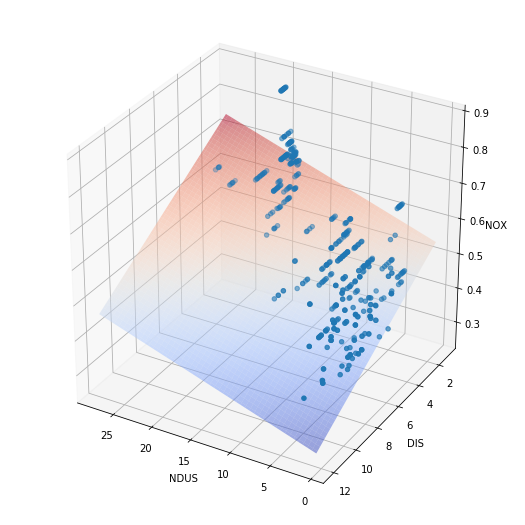

In [20]:
from mpl_toolkits.mplot3d import Axes3D

X_Axis, Y_Axis = np.meshgrid(np.linspace(X.NDUS.min(), X.NDUS.max(),100),
                             np.linspace(X.DIS.min(), X.DIS.max(),100))

Z_Axis = lr_model.params[0] + lr_model.params[1]*X_Axis + lr_model.params[2]*Y_Axis

fig = plt.figure(figsize=(7,7))

ax = Axes3D(fig, azim = 120)

ax.plot_surface(X_Axis, Y_Axis, Z_Axis, alpha =0.5, cmap = plt.cm.coolwarm)

ax.scatter(X.NDUS, X.DIS, y)

ax.set_xlabel('NDUS')
ax.set_ylabel('DIS')
ax.set_zlabel('NOX')
plt.show(ax)

##### Task 2: Find which of the variables is the best predictor of MEDV (median home value)

In [26]:
correlations

{'AGE__NOX': array([[ 1.       ,  0.7314701],
        [ 0.7314701,  1.       ]]),
 'B__NOX': array([[ 1.        , -0.38005064],
        [-0.38005064,  1.        ]]),
 'CHAS__NOX': array([[ 1.        ,  0.09120281],
        [ 0.09120281,  1.        ]]),
 'DIS__NOX': array([[ 1.        , -0.76923011],
        [-0.76923011,  1.        ]]),
 'LSTAT__NOX': array([[ 1.        ,  0.59087892],
        [ 0.59087892,  1.        ]]),
 'NDUS__NOX': array([[ 1.        ,  0.76365145],
        [ 0.76365145,  1.        ]]),
 'NOX__NOX': array([[ 1.,  1.],
        [ 1.,  1.]]),
 'PTRATIO__NOX': array([[ 1.        ,  0.18893268],
        [ 0.18893268,  1.        ]]),
 'RAD__NOX': array([[ 1.        ,  0.61144056],
        [ 0.61144056,  1.        ]]),
 'RM__NOX': array([[ 1.        , -0.30218819],
        [-0.30218819,  1.        ]]),
 'TAX__NOX': array([[ 1.       ,  0.6680232],
        [ 0.6680232,  1.       ]]),
 'ZN__NOX': array([[ 1.        , -0.51660371],
        [-0.51660371,  1.        ]])}

As we can see, corr. Coeff. Between MEDV and LSTAT is -0.73 and that between RM and MEDV is 0.69. As these two values are close to each other, let us try to figure out which can be put to best use.
I will now train my regression model using LSTAT alone, RM alone and both together.

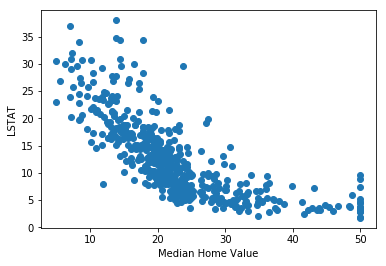

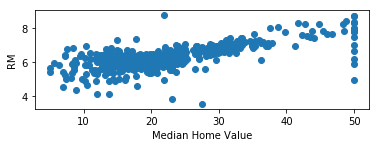

In [24]:
plt.figure()
plt.xlabel('Median Home Value')
plt.ylabel('LSTAT')
plt.scatter(df1.MEDV, df1.LSTAT)
plt.show()
plt.subplot(212)
plt.xlabel('Median Home Value')
plt.ylabel('RM')
plt.scatter(df1.MEDV, df1.RM)
plt.show()


Selecting LSTAT for model build:

In [27]:
#Developing regression model.

y = df1.MEDV
X = df1['LSTAT']
X = sm.add_constant(X)

lr_model = sm.OLS(y,X).fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 14 Mar 2017   Prob (F-statistic):           5.08e-88
Time:                        02:44:47   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

Selecting RM for model build:

In [28]:
#Developing regression model.

y = df1.MEDV
X = df1['RM']
X = sm.add_constant(X)

lr_model = sm.OLS(y,X).fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 14 Mar 2017   Prob (F-statistic):           2.49e-74
Time:                        02:45:02   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.0

Selecting BOTH for model build:

In [29]:
y = df1.MEDV
X = df1[['RM','LSTAT']]
X = sm.add_constant(X)

lr_model = sm.OLS(y,X).fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Tue, 14 Mar 2017   Prob (F-statistic):          7.01e-112
Time:                        02:45:46   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -1.3583      3.173     -0.428      0.6

By mere observation, we can say that when both LSTAT and RM are used then R-squared is maximum. So, let us build a regression equation using both LSTAT and RM.

We get,
### MEDV(Median home value) = 5.0948*(RM) – 0.6424(LSTAT) -1.3583

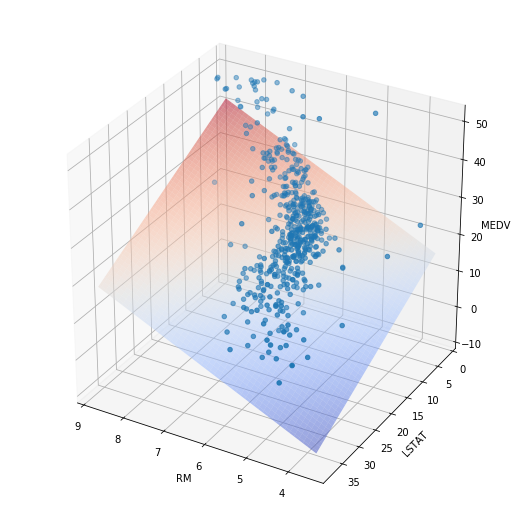

In [30]:
from mpl_toolkits.mplot3d import Axes3D

X_Axis, Y_Axis = np.meshgrid(np.linspace(X.RM.min(), X.RM.max(),100),
                             np.linspace(X.LSTAT.min(), X.LSTAT.max(),100))

Z_Axis = lr_model.params[0] + lr_model.params[1]*X_Axis + lr_model.params[2]*Y_Axis

fig = plt.figure(figsize=(7,7))

ax = Axes3D(fig, azim = 120)

ax.plot_surface(X_Axis, Y_Axis, Z_Axis, alpha =0.5, cmap = plt.cm.coolwarm)

ax.scatter(X.RM, X.LSTAT, y)

ax.set_xlabel('RM')
ax.set_ylabel('LSTAT')
ax.set_zlabel('MEDV')
plt.show(ax)


## Conclusion:
We can conclude that Median value of owner- occupied homes in $1000's can be predicted if we know % lower status of the population(LSTAT) and average number of rooms per dwelling (RM).